In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
from scipy.signal import butter, filtfilt
import xarray as xr
# Claudio Iturra, 2025

dfCS = pd.read_csv("/home/cl/Dropbox/Codes/python/wind/cnv_files/200501_data.csv")
dfCS['DateTime'] = pd.to_datetime(dfCS['DateTime'])

dfW = pd.read_csv("/home/cl/Dropbox/Codes/python/wind/cnv_files/200501Hualpen_data.csv")
dfW['DateTime'] = pd.to_datetime(dfW['DateTime'])

In [2]:
import pandas as pd
df_SST200501_V2 = pd.read_csv('/home/cl/Dropbox/16tb/research_codes/temp/200501/SST20050_v2.csv')

In [3]:
start_date = '2005-01-01 00:00:00'
end_date = '2005-01-26 12:00:00'

In [4]:
df_SST200501_V2 = df_SST200501_V2[(df_SST200501_V2['datetime'] >= start_date) & (df_SST200501_V2['datetime'] <= end_date)]

In [5]:
df_SST200501_V2

,datetime,velocity
0,2005-01-01 00:00:00,15.531029
1,2005-01-01 01:00:00,15.501681
2,2005-01-01 02:00:00,15.472333
3,2005-01-01 03:00:00,15.442985
4,2005-01-01 04:00:00,15.413636
...,...,...
608,2005-01-26 08:00:00,13.735140
609,2005-01-26 09:00:00,13.749596
610,2005-01-26 10:00:00,13.764051
611,2005-01-26 11:00:00,13.778507


In [6]:
df_SST200501_V2.index = pd.to_datetime(df_SST200501_V2['datetime'])

In [7]:
df_SST200501_V2

,datetime,velocity
datetime,,
2005-01-01 00:00:00,2005-01-01 00:00:00,15.531029
2005-01-01 01:00:00,2005-01-01 01:00:00,15.501681
2005-01-01 02:00:00,2005-01-01 02:00:00,15.472333
2005-01-01 03:00:00,2005-01-01 03:00:00,15.442985
2005-01-01 04:00:00,2005-01-01 04:00:00,15.413636
...,...,...
2005-01-26 08:00:00,2005-01-26 08:00:00,13.735140
2005-01-26 09:00:00,2005-01-26 09:00:00,13.749596
2005-01-26 10:00:00,2005-01-26 10:00:00,13.764051


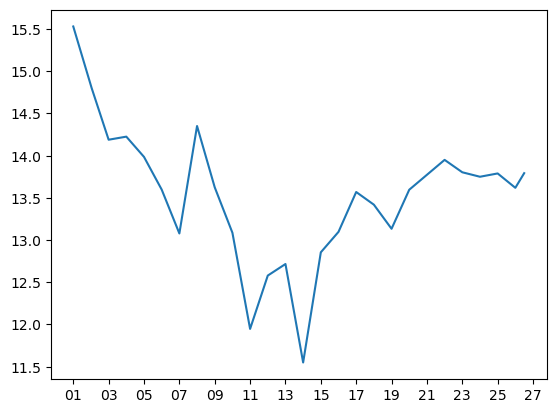

In [8]:
plt.plot(df_SST200501_V2['velocity'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

In [9]:
dfCS = dfCS[(dfCS['DateTime'] >= start_date) & (dfCS['DateTime'] <= end_date)]
dfW = dfW[(dfW['DateTime'] >= start_date) & (dfW['DateTime'] <= end_date)]

In [10]:
dfCS

,DateTime,ff (kt),dd (°),U,V,U_rot,V_rot
0,2005-01-01 00:00:00,14,220.0,4.629495,5.517218,1.219692,7.098188
1,2005-01-01 01:00:00,10,220.0,3.306782,3.940870,0.871208,5.070134
2,2005-01-01 02:00:00,8,220.0,2.645426,3.152696,0.696967,4.056107
3,2005-01-01 03:00:00,9,220.0,2.976104,3.546783,0.784088,4.563121
4,2005-01-01 04:00:00,7,230.0,2.758609,2.314748,1.216875,3.389276
...,...,...,...,...,...,...,...
608,2005-01-26 08:00:00,0,0.0,-0.000000,-0.000000,0.000000,-0.000000
609,2005-01-26 09:00:00,2,70.0,-0.966838,-0.351900,-0.657911,-0.791052
610,2005-01-26 10:00:00,1,80.0,-0.506628,-0.089332,-0.392640,-0.332395
611,2005-01-26 11:00:00,4,340.0,0.703801,-1.933677,1.582104,-1.315822


In [11]:
dfW

,day,month,year,hour,U,V,Speed,Dir,Temp,DateTime,U_rot,V_rot
0,1,1,2005,0,0.82,4.06,4.15,11.41,18.71,2005-01-01 00:00:00,-0.258746,4.133890
1,1,1,2005,1,1.26,4.66,4.83,15.08,18.23,2005-01-01 01:00:00,0.010970,4.827326
2,1,1,2005,2,0.31,3.87,3.88,4.52,17.97,2005-01-01 02:00:00,-0.702193,3.818367
3,1,1,2005,3,0.49,3.40,3.44,8.13,17.72,2005-01-01 03:00:00,-0.406681,3.410969
4,1,1,2005,4,0.52,3.31,3.35,8.91,17.35,2005-01-01 04:00:00,-0.354410,3.331800
...,...,...,...,...,...,...,...,...,...,...,...,...
608,26,1,2005,8,1.05,-3.78,3.92,164.45,12.29,2005-01-26 08:00:00,1.992558,-3.379440
609,26,1,2005,9,1.03,-3.88,4.01,165.15,12.75,2005-01-26 09:00:00,1.999121,-3.481209
610,26,1,2005,10,0.99,-2.96,3.12,161.51,13.53,2005-01-26 10:00:00,1.722371,-2.602910
611,26,1,2005,11,0.85,-4.21,4.29,168.56,14.37,2005-01-26 11:00:00,1.910665,-3.846552


In [12]:
import pickle
file_path = "/home/cl/Dropbox/Codes/python/current/200501NIOS.pkl"
with open(file_path, 'rb') as f:
    dataNIOs = pickle.load(f)

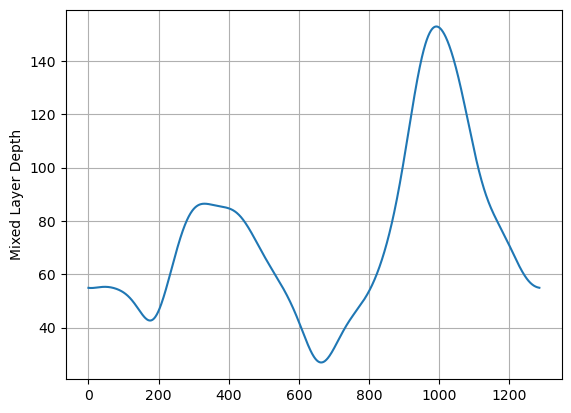

In [13]:
NIOs_speed = np.sqrt(dataNIOs['cvo_NIOSnegDATA'].real**2 + dataNIOs['cvo_NIOSnegDATA'].imag**2)
plt.plot(NIOs_speed[:,20])
plt.ylabel('Mixed Layer Depth')
plt.grid()

In [14]:
df_NIOs = pd.DataFrame({
    'datetime': dataNIOs['time']['datetime'],
    'velocity': NIOs_speed[:,20],
    'u': dataNIOs['cvo_NIOSnegDATA'][:,20].real,
    'v': dataNIOs['cvo_NIOSnegDATA'][:,20].imag
}).set_index('datetime')

In [15]:
df_NIOs_1h = df_NIOs.resample('1h').mean()
df_NIOs_1h

,velocity,u,v
datetime,,,
2004-12-30 17:00:00,54.934439,-18.370266,51.771864
2004-12-30 18:00:00,54.908939,-30.207605,45.635780
2004-12-30 19:00:00,54.884185,-43.183597,33.579476
2004-12-30 20:00:00,54.869704,-51.636813,18.012447
2004-12-30 21:00:00,54.864538,-54.680162,0.558147
...,...,...,...
2005-01-26 08:00:00,55.268972,51.344067,19.961718
2005-01-26 09:00:00,55.171859,42.244397,35.205210
2005-01-26 10:00:00,55.089740,28.785235,46.758746


In [16]:
df_NIOs_1h = df_NIOs_1h[(df_NIOs_1h.index >= start_date) & (df_NIOs_1h.index <= end_date)]

In [17]:
df_NIOs_1h

,velocity,u,v
datetime,,,
2005-01-01 00:00:00,55.158796,42.883133,-34.407175
2005-01-01 01:00:00,55.114326,51.525066,-19.056053
2005-01-01 02:00:00,55.064181,54.857270,-1.782128
2005-01-01 03:00:00,55.008373,52.554817,15.633373
2005-01-01 04:00:00,54.946898,44.873214,31.402342
...,...,...,...
2005-01-26 08:00:00,55.268972,51.344067,19.961718
2005-01-26 09:00:00,55.171859,42.244397,35.205210
2005-01-26 10:00:00,55.089740,28.785235,46.758746


In [18]:
df_SST200501_V2['datetime']

datetime
2005-01-01 00:00:00    2005-01-01 00:00:00
2005-01-01 01:00:00    2005-01-01 01:00:00
2005-01-01 02:00:00    2005-01-01 02:00:00
2005-01-01 03:00:00    2005-01-01 03:00:00
2005-01-01 04:00:00    2005-01-01 04:00:00
                              ...         
2005-01-26 08:00:00    2005-01-26 08:00:00
2005-01-26 09:00:00    2005-01-26 09:00:00
2005-01-26 10:00:00    2005-01-26 10:00:00
2005-01-26 11:00:00    2005-01-26 11:00:00
2005-01-26 12:00:00    2005-01-26 12:00:00
Name: datetime, Length: 613, dtype: object

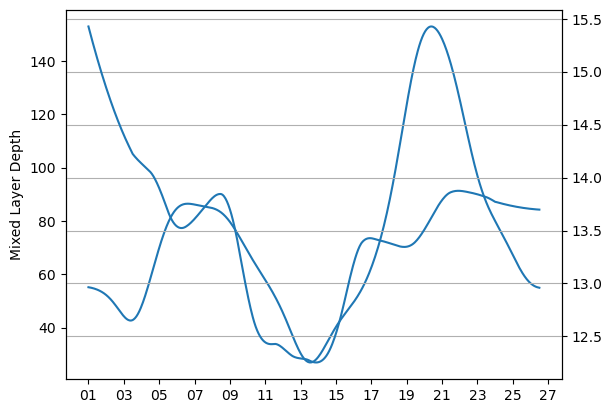

In [19]:
plt.plot(df_NIOs_1h['velocity'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.ylabel('Mixed Layer Depth')
plt.twinx()
plt.plot(df_SST200501_V2.index, savgol_filter(df_SST200501_V2['velocity'].values,24*5,2))
plt.grid()

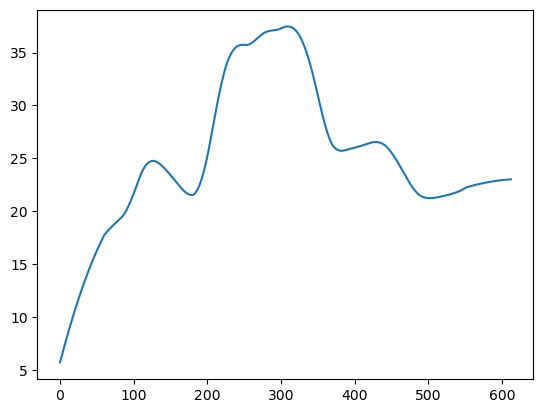

In [20]:
plt.plot(np.abs((savgol_filter(df_SST200501_V2['velocity'].values,24*5,2)*10)-160))

In [21]:
def butter_filter(data, dt_hours, cutoff_hours=None, band_hours=None, ftype='low', order=4):
    """
    Apply Butterworth filter to a time series with hourly resolution.
    
    Parameters
    ----------
    data : array
        Input time series
    dt_hours : float
        Sampling resolution in hours (e.g., 1 hour)
    cutoff_hours : float
        Cutoff period in hours for low/high pass (ignored if band_hours is used)
    band_hours : tuple
        (low_period, high_period) in hours for bandpass
    ftype : str
        'low', 'high', or 'band'
    order : int
        Filter order
    
    Returns
    -------
    filtered : array
        Filtered time series
    """
    fs = 1.0 / dt_hours              # sampling frequency [samples/hour]
    nyquist = 0.5 * fs               # Nyquist frequency [cycles/hour]

    if ftype in ['low', 'high']:
        freq = 1.0 / cutoff_hours    # convert period in hours -> frequency [cycles/hour]
        wn = freq / nyquist          # normalized cutoff
        b, a = butter(order, wn, btype=ftype)
    elif ftype == 'band':
        low, high = 1.0 / band_hours[1], 1.0 / band_hours[0]
        wn = [low / nyquist, high / nyquist]
        b, a = butter(order, wn, btype='band')
    else:
        raise ValueError("ftype must be 'low', 'high', or 'band'")
    
    return filtfilt(b, a, data)

In [22]:
"""
Slab-model wind-driven current (hourly winds + hourly MLD)
- Latitude default: -36 deg (Southern Hemisphere)
- RK4 integration, dt = 1 hour
- Wind stress: quadratic drag: tau = rho_air * Cd * |U| * U_component
- Outputs: hourly u, v, speed and plots

Dependencies:
  numpy, matplotlib, scipy

Example usage included at bottom (synthetic wind + oscillating MLD).
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

def compute_coriolis(lat_deg):
    """Coriolis parameter f at latitude (deg)."""
    Omega = 7.2921150e-5  # Earth's rotation rate [s^-1]
    lat_rad = np.deg2rad(lat_deg)
    return 2.0 * Omega * np.sin(lat_rad)

def compute_wind_stress(u_wind, v_wind, rho_a=1.225, Cd=1.3e-3):
    """
    Quadratic wind stress.
    Inputs:
      u_wind, v_wind : arrays (m/s)
      rho_a : air density (kg/m^3)
      Cd : drag coefficient (dimensionless)
    Returns:
      tau_x, tau_y (N/m^2)
    """
    U10 = np.sqrt(u_wind**2 + v_wind**2)
    tau_x = rho_a * Cd * U10 * u_wind
    tau_y = rho_a * Cd * U10 * v_wind
    return tau_x, tau_y

def slab_model_hourly(u_wind, v_wind, h_mld, lat_deg=-36.0,
                      r_days=3.0, rho_w=1025.0, rho_a=1.225, Cd=1.3e-3,
                      u0=0.0, v0=0.0):
    """
    Slab-model integration with hourly forcing and hourly MLD.
    
    Inputs:
      u_wind, v_wind : 1D arrays, hourly winds at 10m (m/s)
      h_mld : scalar or 1D array of MLD in meters (if scalar, it's used for all times)
      lat_deg : latitude (degrees). Default -36.
      r_days : damping timescale in days (converted to r = 1/(r_days*86400)).
      rho_w : seawater density (kg/m^3)
      rho_a, Cd : air density and drag coeff for stress calc
      u0, v0 : initial currents (m/s)
    Returns:
      times_hours (np.array), u_curr, v_curr, speed, params_dict
    """
    # basic checks & prep
    assert len(u_wind) == len(v_wind), "u_wind and v_wind must match length"
    n = len(u_wind)
    dt = 3600.0  # seconds per hour
    times = np.arange(n)  # hours since start

    # MLD as array
    if np.isscalar(h_mld):
        h_arr = np.full(n, float(h_mld))
    else:
        h_arr = np.asarray(h_mld, dtype=float)
        assert h_arr.shape[0] == n, "h_mld array must match wind length"

    # parameters
    f = compute_coriolis(lat_deg)
    r = 1.0 / (r_days * 86400.0)  # s^-1

    # compute wind stress
    tau_x, tau_y = compute_wind_stress(np.asarray(u_wind), np.asarray(v_wind),
                                       rho_a=rho_a, Cd=Cd)

    # allocate arrays
    u = np.zeros(n)
    v = np.zeros(n)
    u[0] = u0
    v[0] = v0

    # right-hand side function
    def rhs(u_c, v_c, tx, ty, h_now):
        du_dt = (tx / (rho_w * h_now)) + f * v_c - r * u_c
        dv_dt = (ty / (rho_w * h_now)) - f * u_c - r * v_c
        return du_dt, dv_dt

    # RK4 integration (explicit, wind & h held constant within the hour)
    for t in range(n - 1):
        tx = tau_x[t]
        ty = tau_y[t]
        hnow = h_arr[t] if h_arr[t] > 0 else 1e-6  # protect against zero depth

        k1u, k1v = rhs(u[t], v[t], tx, ty, hnow)
        k2u, k2v = rhs(u[t] + 0.5*dt*k1u, v[t] + 0.5*dt*k1v, tx, ty, hnow)
        k3u, k3v = rhs(u[t] + 0.5*dt*k2u, v[t] + 0.5*dt*k2v, tx, ty, hnow)
        k4u, k4v = rhs(u[t] + dt*k3u, v[t] + dt*k3v, tx, ty, hnow)

        u[t+1] = u[t] + (dt/6.0)*(k1u + 2.0*k2u + 2.0*k3u + k4u)
        v[t+1] = v[t] + (dt/6.0)*(k1v + 2.0*k2v + 2.0*k3v + k4v)

    speed = np.sqrt(u**2 + v**2)

    params = {'lat_deg': lat_deg, 'f': f, 'r_s^-1': r, 'r_days': r_days,
              'rho_w': rho_w, 'rho_a': rho_a, 'Cd': Cd}

    return times, u, v, speed, params


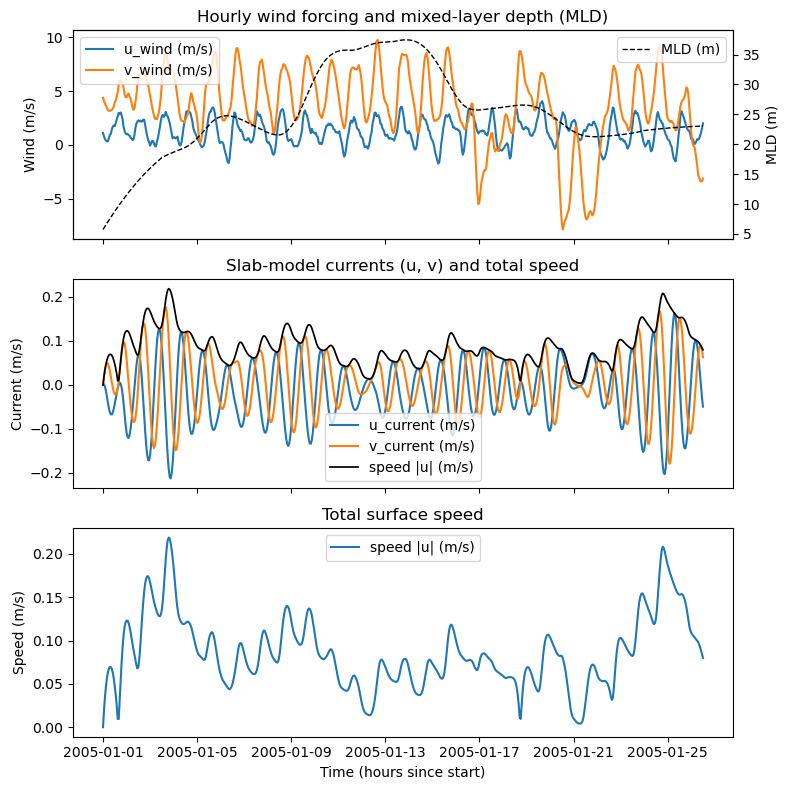

In [23]:
t = np.arange(len(dfW['U']))
timeX = dfW['DateTime']

u_wind = savgol_filter(dfW['U'],10,2)
v_wind = savgol_filter(dfW['V'],10,2)

# Example hourly MLD: seasonal/diurnal variation between 15 and 60 m
#h_mld = 5.0 + 5.0*np.sin(2*np.pi*t/24.0) + 15.0*np.sin(2*np.pi*t/(24*5.0))
#h_mld = 20 + 15.0*np.sin(2*np.pi*t/(24*10))
#h_mld = 20 + 15.0*np.sin(2*np.pi*t/(24*25))
#h_mld = np.full(len(dfW['U']), 10)
#h_mld = np.abs((savgol_filter(df_SST200501_V2['velocity'].values,24*5,2)*10)-170)
h_mld = np.abs((savgol_filter(df_SST200501_V2['velocity'].values,24*5,2)*10)-160)

# Run the model at latitude -36 deg (Southern Hemisphere)
times_h, u_curr, v_curr, speed, params = slab_model_hourly(
    u_wind, v_wind, h_mld, lat_deg=-36.0,
    r_days=3.0, rho_w=1025.0, rho_a=1.225, Cd=1.3e-3,
    u0=0.0, v0=0.0
)


# Plot: winds + MLD, currents u/v + speed, speed alone for clarity
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# Panel 1: wind components and MLD (secondary y-axis)
ax = axs[0]
ax.plot(timeX, u_wind, label='u_wind (m/s)')
ax.plot(timeX, v_wind, label='v_wind (m/s)')
ax.set_ylabel('Wind (m/s)')
ax.legend(loc='upper left')
ax2 = ax.twinx()
ax2.plot(timeX, h_mld, 'k--', linewidth=1, label='MLD (m)')
ax2.set_ylabel('MLD (m)')
ax2.legend(loc='upper right')
ax.set_title('Hourly wind forcing and mixed-layer depth (MLD)')

# Panel 2: modeled currents and total speed
ax = axs[1]
ax.plot(timeX, u_curr, label='u_current (m/s)')
ax.plot(timeX, v_curr, label='v_current (m/s)')
ax.plot(timeX, speed, 'k', linewidth=1.25, label='speed |u| (m/s)')
ax.set_ylabel('Current (m/s)')
ax.legend()
ax.set_title('Slab-model currents (u, v) and total speed')

# Panel 3: speed zoom
ax = axs[2]
ax.plot(timeX, speed, label='speed |u| (m/s)')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time (hours since start)')
ax.legend()
ax.set_title('Total surface speed')
plt.tight_layout()
plt.show()

In [24]:
from multitaper import MTSpec

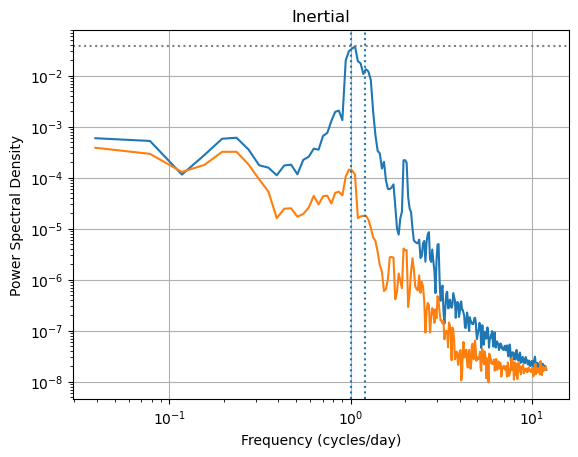

In [25]:
dt = 1/24
cv = u_curr +1j*v_curr
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog( fx[fx>0],Sx[fx>0])#plot positive side
plt.loglog(-fx[fx<0],Sx[fx<0])#plot negative side
plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.axhline(np.max(Sx[fx>0]), linestyle = ':', color = 'grey')
plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency (cycles/day)')
plt.title('Inertial')
del cv, P, spec, dt
plt.grid()

In [26]:
import warnings
warnings.filterwarnings('ignore')  #suppress some warnings about future code changes

import netCDF4 as nc
import xarray as xr    
import numpy as np
import datetime          #https://docs.python.org/3/library/datetime.html
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.signal as sg  #Package for signal analysis
import scipy.ndimage as si #Another package for signal analysis
from multitaper import MTSpec  #using German Prieto's multitaper package, https://github.com/gaprieto/multitaper
from scipy import fft as spfft
from scipy.fft import fft 
from scipy.stats import chi2
from scipy.special import digamma

In [27]:
import spectrum
import analytic_wavelet
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import signal, ndimage
from scipy import fft as spfft
from scipy.fft import fft 
import time

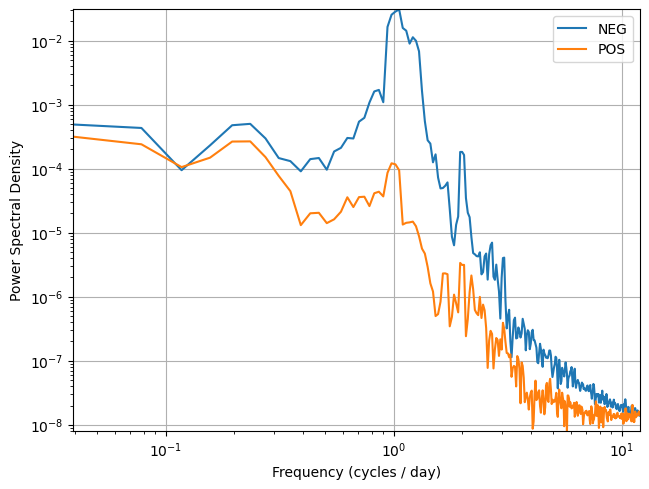

In [28]:
dt = 1/24
cv = u_curr +1j*v_curr 
cv_centered = cv - np.mean(cv)
f, p = signal.periodogram(cv_centered, fs=1/dt, return_onesided=False, axis=0)

NW = 2
Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cv_centered, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cv_centered))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
p = np.mean(Sk*eigenvalues, axis=1) * dt
plt.loglog(f[f >= 0], p[np.where(f >= 0)])
plt.loglog(np.abs(f[f < 0]), p[np.where(f < 0)])

plt.autoscale(enable=True, tight=True)
plt.tight_layout(), plt.grid()
plt.xlabel("Frequency (cycles / day)")
plt.ylabel("Power Spectral Density")
plt.legend(['NEG','POS'])

Text(0.5, 1.0, 'Negative Freq')

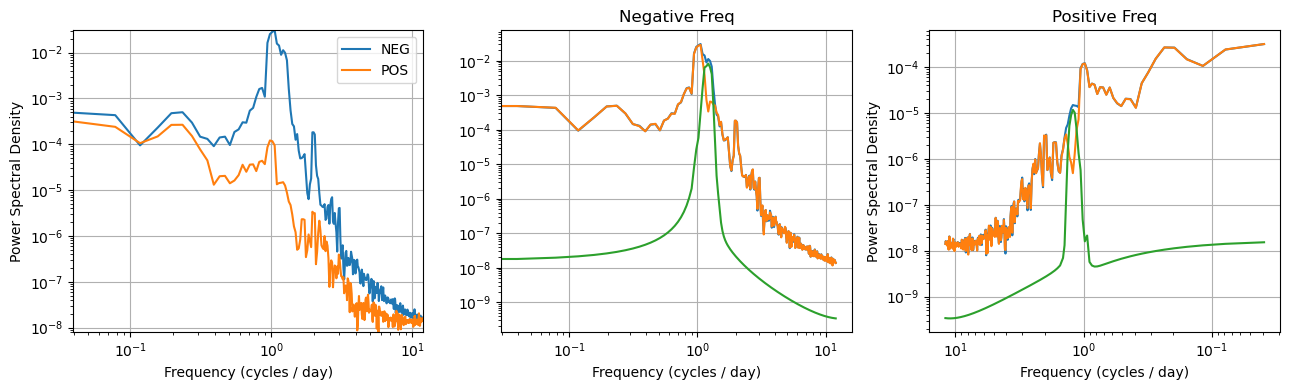

In [29]:
dt = 1/24
cv = u_curr +1j*v_curr 
cv_centered = cv - np.mean(cv)
f, p = signal.periodogram(cv_centered, fs=1/dt, return_onesided=False, axis=0)

NW = 2
Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cv_centered, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cv_centered))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
p = np.mean(Sk*eigenvalues, axis=1) * dt

plt.figure(figsize=(13, 4))
plt.subplot(1,3,1)
plt.loglog(f[f >= 0], p[np.where(f >= 0)])
plt.loglog(np.abs(f[f < 0]), p[np.where(f < 0)])
plt.autoscale(enable=True, tight=True)
plt.tight_layout(), plt.grid()
plt.xlabel("Frequency (cycles / day)")
plt.ylabel("Power Spectral Density")
plt.legend(['NEG','POS'])
plt.tight_layout()

#---------------------------------------------

gamma = 3
beta = 100
omega=2*np.pi*31/len(cv_centered)

morse = analytic_wavelet.GeneralizedMorseWavelet(gamma, beta)
psi, psif = morse.make_wavelet(len(cv_centered), omega)

#compute two bandpassed signals, one for the negative side and one for the positive side
cvo_K1NIOSneg = analytic_wavelet.analytic_wavelet_transform(cv_centered, psif, False).flatten() #NEGATIVE BAND
cvo_K1NIOSpos = np.conj(analytic_wavelet.analytic_wavelet_transform(np.conj(cv_centered), psif, False)).flatten() #POSITIVE BAND
cvo_K1NIOS = 1/np.sqrt(2)*(cvo_K1NIOSneg + cvo_K1NIOSpos)
cvr_K1NIOS = cvo_K1NIOS - cv_centered

Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cvo_K1NIOS, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cvo_K1NIOS))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
po = np.mean(Sk*eigenvalues, axis=1) * dt

Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cvr_K1NIOS, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cvr_K1NIOS))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
pr = np.mean(Sk*eigenvalues, axis=1) * dt

plt.subplot(1,3,3)
plt.loglog(np.abs(f[f < 0]), p[np.where(f < 0)])
plt.loglog(np.abs(f[f < 0]), pr[np.where(f < 0)])
plt.loglog(np.abs(f[f < 0]), po[np.where(f < 0)])
plt.xlabel("Frequency (cycles / day)")
plt.ylabel("Power Spectral Density")
plt.title('Positive Freq')
plt.tight_layout()
plt.gca().invert_xaxis(), plt.grid()

plt.subplot(1,3,2)
plt.loglog(f[f >= 0], p[np.where(f >= 0)])
plt.loglog(f[f >= 0], pr[np.where(f >= 0)])
plt.loglog(f[f >= 0], po[np.where(f >= 0)])
plt.tight_layout(), plt.grid()
plt.xlabel("Frequency (cycles / day)")
plt.title('Negative Freq')

Text(0.5, 1.0, 'Negative Freq')

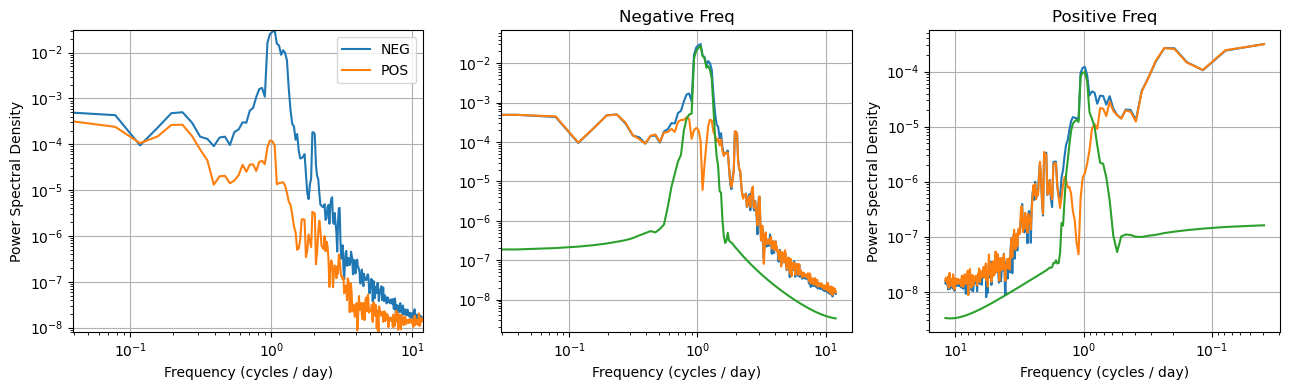

In [30]:
dt = 1/24
cv = u_curr +1j*v_curr 
cv_centered = cv - np.mean(cv)
f1, p1 = signal.periodogram(cv_centered, fs=1/dt, return_onesided=False, axis=0)

NW = 2
Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cv_centered, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cv_centered))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
p1 = np.mean(Sk*eigenvalues, axis=1) * dt

plt.figure(figsize=(13, 4))
plt.subplot(1,3,1)
plt.loglog(f1[f1 >= 0], p[np.where(f1 >= 0)])
plt.loglog(np.abs(f1[f1 < 0]), p1[np.where(f1 < 0)])
plt.autoscale(enable=True, tight=True)
plt.tight_layout(), plt.grid()
plt.xlabel("Frequency (cycles / day)")
plt.ylabel("Power Spectral Density")
plt.legend(['NEG','POS'])
plt.tight_layout()

#---------------------------------------------

gamma = 3
beta = 8
omega=2*np.pi*28/len(cv_centered)

morse = analytic_wavelet.GeneralizedMorseWavelet(gamma, beta)
psi, psif = morse.make_wavelet(len(cv_centered), omega)

#compute two bandpassed signals, one for the negative side and one for the positive side
cvo_windNIOSneg = analytic_wavelet.analytic_wavelet_transform(cv_centered, psif, False).flatten() #NEGATIVE BAND
cvo_windNIOSpos = np.conj(analytic_wavelet.analytic_wavelet_transform(np.conj(cv_centered), psif, False)).flatten() #POSITIVE BAND
cvo_windNIOS = 1/np.sqrt(2)*(cvo_windNIOSneg + cvo_windNIOSpos)
cvr_windNIOS = cvo_windNIOS - cv_centered

Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cvo_windNIOS, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cvo_K1NIOS))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
po1 = np.mean(Sk*eigenvalues, axis=1) * dt

Sk_complex, weights, eigenvalues = spectrum.mtm.pmtm(cvr_windNIOS, NW=NW, k=2*NW-1, method="adapt", NFFT=len(cvr_K1NIOS))
Sk = np.abs(Sk_complex)**2
Sk = Sk.T
pr1 = np.mean(Sk*eigenvalues, axis=1) * dt

plt.subplot(1,3,3)
plt.loglog(np.abs(f1[f1 < 0]), p1[np.where(f1 < 0)])
plt.loglog(np.abs(f1[f1 < 0]), pr1[np.where(f1 < 0)])
plt.loglog(np.abs(f1[f1 < 0]), po1[np.where(f1 < 0)])
plt.xlabel("Frequency (cycles / day)")
plt.ylabel("Power Spectral Density")
plt.title('Positive Freq')
plt.tight_layout()
plt.gca().invert_xaxis(), plt.grid()

plt.subplot(1,3,2)
plt.loglog(f1[f1 >= 0], p1[np.where(f1 >= 0)])
plt.loglog(f1[f1 >= 0], pr1[np.where(f1 >= 0)])
plt.loglog(f1[f1 >= 0], po1[np.where(f1 >= 0)])
plt.tight_layout(), plt.grid()
plt.xlabel("Frequency (cycles / day)")
plt.title('Negative Freq')

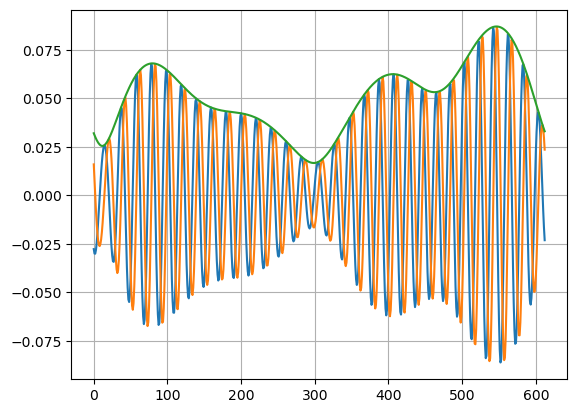

In [31]:
plt.plot(cvo_K1NIOSneg.real)
plt.plot(cvo_K1NIOSneg.imag)
plt.plot(np.sqrt(cvo_K1NIOSneg.real**2 + cvo_K1NIOSneg.imag**2))
plt.grid()

In [32]:
from datetime import datetime

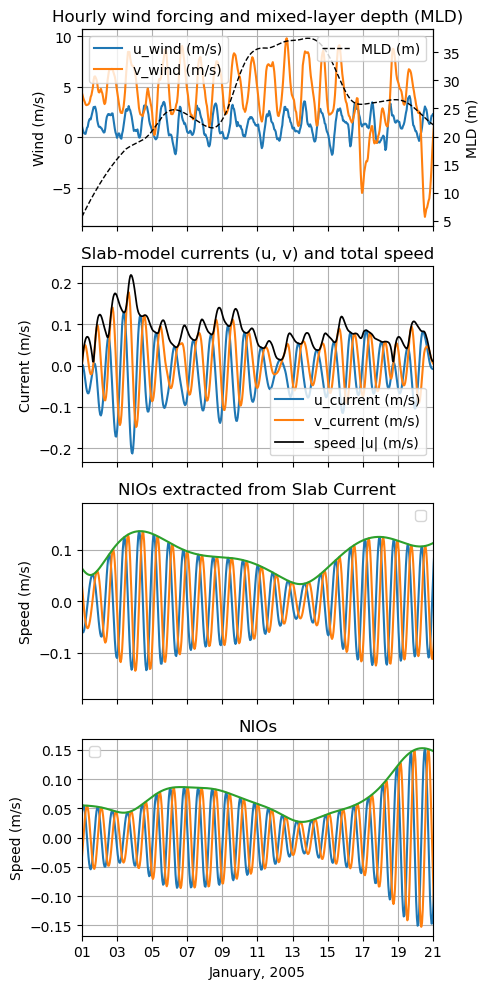

In [33]:
# Plot: winds + MLD, currents u/v + speed, speed alone for clarity
fig, axs = plt.subplots(4, 1, figsize=(5, 10), sharex=True)

# Panel 1: wind components and MLD (secondary y-axis)
ax = axs[0]
ax.plot(timeX, u_wind, label='u_wind (m/s)')
ax.plot(timeX, v_wind, label='v_wind (m/s)')
ax.set_ylabel('Wind (m/s)')
ax.legend(loc='upper left')
ax.grid()
ax2 = ax.twinx()
ax2.plot(timeX, h_mld, 'k--', linewidth=1, label='MLD (m)')
ax2.set_ylabel('MLD (m)')
ax2.legend(loc='upper right')
ax.set_title('Hourly wind forcing and mixed-layer depth (MLD)')

# Panel 2: modeled currents and total speed
ax = axs[1]
ax.plot(timeX, u_curr, label='u_current (m/s)')
ax.plot(timeX, v_curr, label='v_current (m/s)')
ax.plot(timeX, speed, 'k', linewidth=1.25, label='speed |u| (m/s)')
ax.set_ylabel('Current (m/s)')
ax.legend()
ax.grid()
ax.set_title('Slab-model currents (u, v) and total speed')

# Panel 3: speed zoom
r3 = 2 # co-factor
ax = axs[2]
ax.plot(timeX, cvo_K1NIOSneg.real*r3)
ax.plot(timeX, cvo_K1NIOSneg.imag*r3)
ax.plot(timeX, np.sqrt((cvo_K1NIOSneg.real*r3)**2 + (cvo_K1NIOSneg.imag*r3)**2))
ax.set_ylabel('Speed (m/s)')
ax.legend()
ax.grid()
ax.set_title('NIOs extracted from Slab Current')
plt.tight_layout()


# Panel 4: speed zoom
ax = axs[3]
ax.plot(df_NIOs_1h['u']/1000)
ax.plot(df_NIOs_1h['v']/1000)
ax.plot(df_NIOs_1h['velocity']/1000)
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('January, 2005')
ax.legend()
ax.grid()
ax.set_title('NIOs')
plt.tight_layout()
plt.xlim(datetime(2005, 1, 1), datetime(2005, 1, 21))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

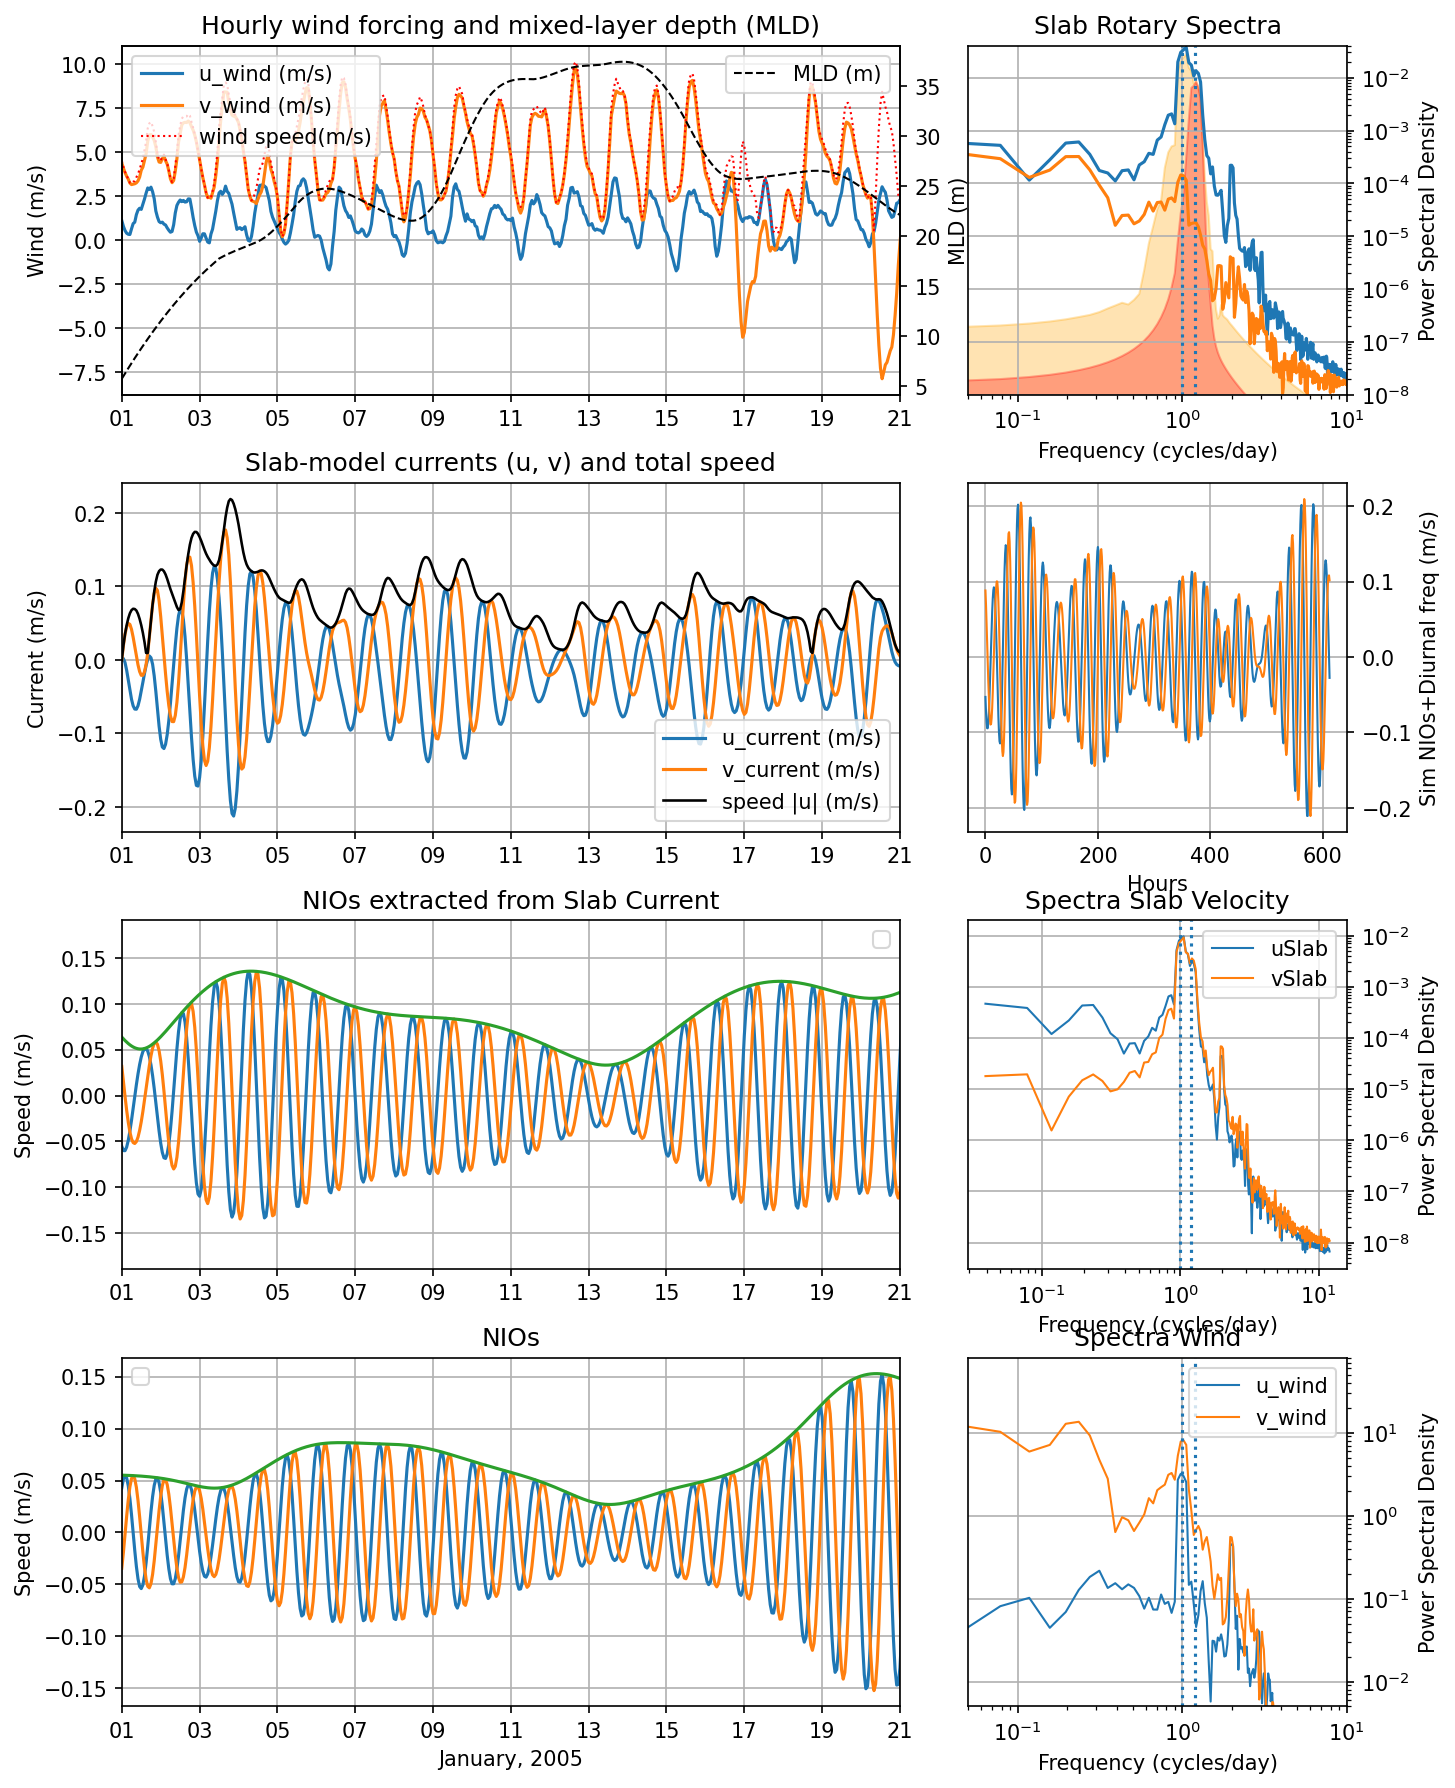

In [46]:
from matplotlib import pyplot
pyplot.rcParams['figure.dpi'] = 150
plt.figure(figsize=(12,12))

plt.subplot(4,2,1)
plt.plot(timeX, u_wind, label='u_wind (m/s)')
plt.plot(timeX, v_wind, label='v_wind (m/s)')
plt.plot(timeX, np.sqrt(u_wind**2 + v_wind**2), label ='wind speed(m/s)', color = 'r', linewidth = 1, linestyle = ':')
plt.ylabel('Wind (m/s)')
plt.legend(loc='upper left')
plt.grid()
plt.twinx()
plt.plot(timeX, h_mld, 'k--', linewidth=1, label='MLD (m)')
plt.ylabel('MLD (m)')
plt.legend(loc='upper right')
plt.title('Hourly wind forcing and mixed-layer depth (MLD)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.xlim(datetime(2005, 1, 1), datetime(2005, 1, 21))

plt.subplot(4,2,3)
plt.plot(timeX, u_curr, label='u_current (m/s)')
plt.plot(timeX, v_curr, label='v_current (m/s)')
plt.plot(timeX, speed, 'k', linewidth=1.25, label='speed |u| (m/s)')
plt.ylabel('Current (m/s)')
plt.legend()
plt.grid()
plt.title('Slab-model currents (u, v) and total speed')
plt.xlim(datetime(2005, 1, 1), datetime(2005, 1, 21))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.subplot(4,2,5)
r3 = 2 # co-factor
plt.plot(timeX, cvo_K1NIOSneg.real*r3)
plt.plot(timeX, cvo_K1NIOSneg.imag*r3)
plt.plot(timeX, np.sqrt((cvo_K1NIOSneg.real*r3)**2 + (cvo_K1NIOSneg.imag*r3)**2))
plt.ylabel('Speed (m/s)')
plt.legend()
plt.grid()
plt.title('NIOs extracted from Slab Current')
plt.tight_layout()
plt.xlim(datetime(2005, 1, 1), datetime(2005, 1, 21))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.subplot(4,2,7)
plt.plot(df_NIOs_1h['u']/1000)
plt.plot(df_NIOs_1h['v']/1000)
plt.plot(df_NIOs_1h['velocity']/1000)
plt.ylabel('Speed (m/s)')
plt.xlabel('January, 2005')
plt.legend()
plt.grid()
plt.title('NIOs')
plt.tight_layout()
plt.xlim(datetime(2005, 1, 1), datetime(2005, 1, 21))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

plt.subplot(4,4,3)

dt = 1/24
cv = u_curr +1j*v_curr
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.fill_between(f1[f1 >= 0], po1[np.where(f1 >= 0)], color = 'orange', alpha = 0.3, label = 'NIOs+Diurnal')
plt.fill_between(f[f >= 0], po[np.where(f >= 0)], color = 'r', alpha = 0.3, label = 'NIOs')
plt.loglog( fx[fx>0],Sx[fx>0], label = 'Negative')#plot positive side
plt.loglog(-fx[fx<0],Sx[fx<0], label = 'Positive')#plot negative side
plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency (cycles/day)')
plt.title('Slab Rotary Spectra')
del cv, P, spec, dt
plt.grid()
plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)
plt.gca().yaxis.set_label_position("right")
plt.xlim([0.05, 10])
plt.ylim([0.00000001, 0.04])

plt.subplot(4,4,7)
plt.plot(cvo_windNIOSneg.real, linewidth = 1)
plt.plot(cvo_windNIOSneg.imag, linewidth = 1)
plt.ylabel('Sim NIOs+Diurnal freq (m/s)')
plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)
plt.gca().yaxis.set_label_position("right")
plt.xlabel('Hours')
plt.grid()

plt.subplot(4,4,11)

dt = 1/24
cv = u_curr
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog(fx[fx>0],Sx[fx>0], linewidth = 1,  label = 'uSlab')#plot positive side

cv = v_curr
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog(fx[fx>0],Sx[fx>0], linewidth = 1,  label = 'vSlab')#plot positive side

plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency (cycles/day)')
plt.title('Spectra Slab Velocity')
#plt.xlim([0.05, 10])
#plt.ylim([0.005, 80])
plt.grid()
plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)
plt.gca().yaxis.set_label_position("right")
plt.legend()
del cv, P, spec, dt

plt.subplot(4,4,15)
dt = 1/24
cv = u_wind
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog(fx[fx>0],Sx[fx>0], linewidth = 1,  label = 'u_wind')#plot positive side

cv = v_wind
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog(fx[fx>0],Sx[fx>0], linewidth = 1,  label = 'v_wind')#plot positive side
plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.legend()


plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency (cycles/day)')
plt.title('Spectra Wind')
plt.xlim([0.05, 10])
plt.ylim([0.005, 80])
plt.grid()
plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)
plt.gca().yaxis.set_label_position("right")
del cv, P, spec, dt


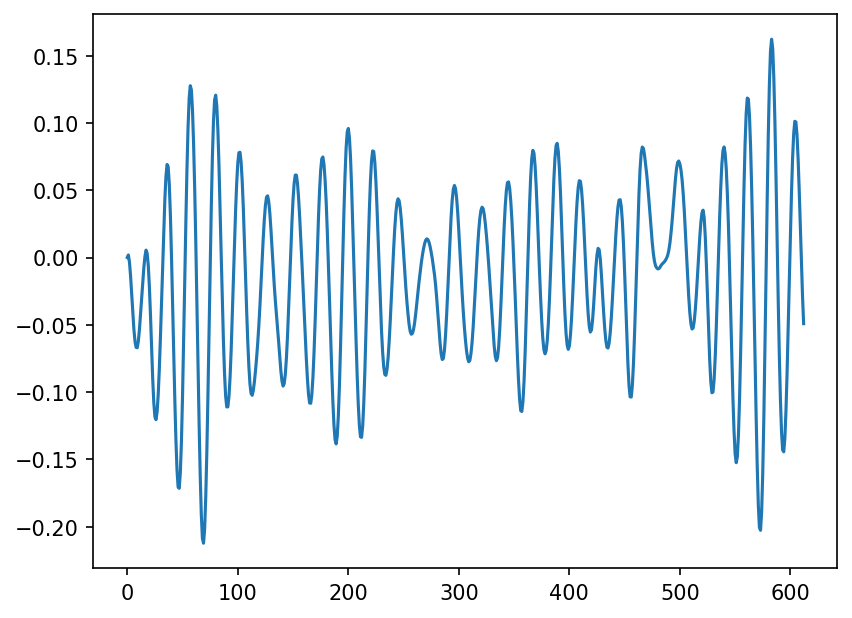

In [35]:
plt.plot(u_curr)

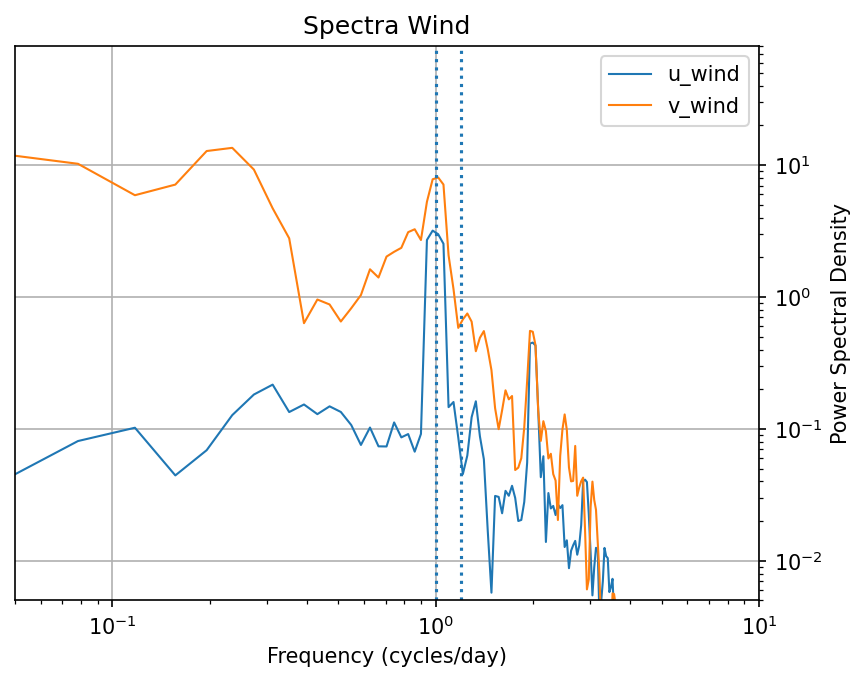

In [42]:
dt = 1/24
cv = u_wind
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog(fx[fx>0],Sx[fx>0], linewidth = 1,  label = 'u_wind')#plot positive side

cv = v_wind
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog(fx[fx>0],Sx[fx>0], linewidth = 1,  label = 'v_wind')#plot positive side
plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.legend()


plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency (cycles/day)')
plt.title('Spectra Wind')
plt.xlim([0.05, 10])
plt.ylim([0.005, 80])
plt.grid()
plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)
plt.gca().yaxis.set_label_position("right")
del cv, P, spec, dt

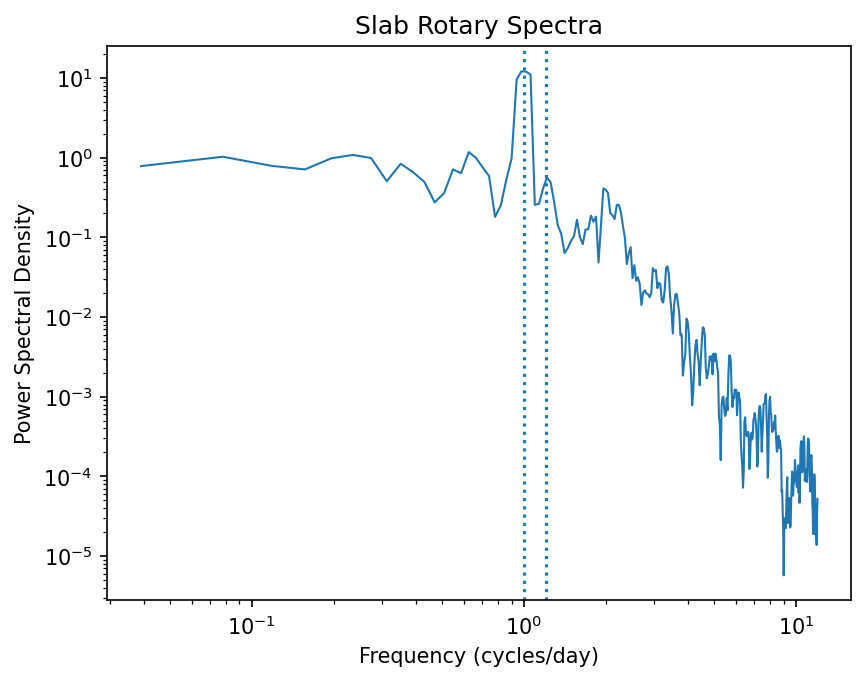

In [57]:
dt = 1/24
cv = np.sqrt(u_wind**2 + v_wind**2)
P = 2
spec = MTSpec(cv-np.mean(cv), nw=P, dt=dt, iadapt=1, nfft=len(cv))
Sx = np.ravel(spec.spec)
fx = np.ravel(spec.freq)
plt.loglog(fx[fx>0],Sx[fx>0], linewidth = 1,  label = 'Negative')#plot positive side
plt.axvline(24/24, linestyle = ':')
plt.axvline(24/20, linestyle = ':')
plt.ylabel('Power Spectral Density')
plt.xlabel('Frequency (cycles/day)')
plt.title('Slab Rotary Spectra')
del cv, P, spec, dt

In [138]:
t = np.arange(len(dfW['U']))
timeX = dfW['DateTime']

u_wind = savgol_filter(dfW['U'],10,2)
v_wind = savgol_filter(dfW['V'],10,2)

h_mld = np.abs((savgol_filter(df_SST200501_V2['velocity'].values,24*5,2)*10)-170)

# Run the model at latitude -36 deg (Southern Hemisphere)
times_h, u_curr, v_curr, speed, params = slab_model_hourly(
    u_wind, v_wind, h_mld, lat_deg=-36.0,
    r_days=3.0, rho_w=1025.0, rho_a=1.225, Cd=1.3e-3,
    u0=0.0, v0=0.0
)

In [ ]:
# Panel 1: wind components and MLD (secondary y-axis)
ax = axs[0]
ax.plot(timeX, u_wind, label='u_wind (m/s)')
ax.plot(timeX, v_wind, label='v_wind (m/s)')
ax.set_ylabel('Wind (m/s)')
ax.legend(loc='upper left')
ax.grid()
ax2 = ax.twinx()
ax2.plot(timeX, h_mld, 'k--', linewidth=1, label='MLD (m)')
ax2.set_ylabel('MLD (m)')
ax2.legend(loc='upper right')
ax.set_title('Hourly wind forcing and mixed-layer depth (MLD)')

# Panel 2: modeled currents and total speed
ax = axs[1]
ax.plot(timeX, u_curr, label='u_current (m/s)')
ax.plot(timeX, v_curr, label='v_current (m/s)')
ax.plot(timeX, speed, 'k', linewidth=1.25, label='speed |u| (m/s)')
ax.set_ylabel('Current (m/s)')
ax.legend()
ax.grid()
ax.set_title('Slab-model currents (u, v) and total speed')

# Panel 3: speed zoom
r3 = 2.2 # co-factor
ax = axs[2]
ax.plot(timeX, cvo_K1NIOSneg.real*r3)
ax.plot(timeX, cvo_K1NIOSneg.imag*r3)
ax.plot(timeX, np.sqrt((cvo_K1NIOSneg.real*r3)**2 + (cvo_K1NIOSneg.imag*r3)**2))
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time (hours since start)')
ax.legend()
ax.grid()
ax.set_ylabel([-0.15, 0.15])
ax.set_title('NIOs extracted from Slab Current')
plt.tight_layout()
plt.ylim([-0.15, 0.15])

# Panel 4: speed zoom
ax = axs[3]
ax.plot(df_NIOs_1h['u']/1000)
ax.plot(df_NIOs_1h['v']/1000)
ax.plot(df_NIOs_1h['velocity']/1000)
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time (hours since start)')
ax.legend()
ax.grid()
ax.set_title('NIOs')
plt.tight_layout()
plt.xlim(datetime(2005, 1, 1), datetime(2005, 1, 21))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
ax.set_ylabel([-0.15, 0.15])